In [ ]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

In [2]:
from src.imager.pyralysis import PyralysisImager 

image = 'img_0001'
sim = 'sim1'

ms_folder =  ROOT / 'data/processed' / image / sim
ms_path = ms_folder / 'visibilities.ms'

imager = PyralysisImager(vis=str(ms_path), output_folder=str(ms_folder))

In [3]:
imager.start_client(
    config = {
        "backend": "numba_cpu",
        "memory_fraction": 0.8,
        "cpu_fraction": 0.9,
        "verbose": False,
    }
)

In [4]:
imager.setup_dataset(
    config={
        "filter_flag_column": False,
        "calculate_psf": False,
        "imsize": 256,
        "cellsize": 0.02, # arcsec
        "hermitian_symmetry": True,
        "verbose": False,
    }
)

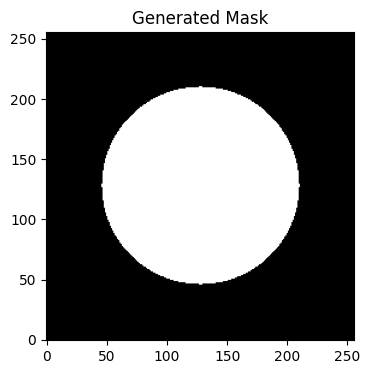

In [5]:
imager.set_mask(
    config={
        "threshold": 0.8,
        "plot_mask": True,
    }
)

In [6]:
imager.reconstruct(
    config={
        "estimator": {
            "algorithm": "bilinear_interpolation",
            "padding_factor": 1.0,
            # "kernel": {
            #     "algorithm": "pswf1",
            #     "size": 7,
            #     "oversampling_factor": 1,
            # },
        },
        "linear_search": {
            "algorithm": "backtracking_armijo",
            "step": 10,
        },
        "projection": "less_than",
        "differentiable": {
            "algorithm": "lbfgs",
            "niter": 1,
        },
        "optimizer": {
            "algorithm": "sdmm",
            "niter": 2,
        },
        "verbose": False,
    }
)

In [7]:
imager.stop_client()